In [1]:
import csv 

import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import datetime
import pandas.io.data
%matplotlib inline


C:\Anaconda2\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
#Loads the data
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M')

df = pd.read_csv("C:\Users\Thinkpad\Documents\DTU\Python\week 3\SFCrime_from_1_Jan_2003.csv", 
                 parse_dates={'datetime': ['Date', 'Time']}, date_parser=dateparse)

In [3]:
df.columns

Index([u'datetime', u'IncidntNum', u'Category', u'Descript', u'DayOfWeek',
       u'PdDistrict', u'Resolution', u'Address', u'X', u'Y', u'Location',
       u'PdId'],
      dtype='object')

In [4]:
cc_df = DataFrame(df,columns = ['Category','X','Y'])

cc_df.head()

,Category,X,Y
0,OTHER OFFENSES,-122.413791,37.783837
1,DRUG/NARCOTIC,-122.413791,37.783837
2,WARRANTS,-122.413791,37.783837
3,NON-CRIMINAL,-122.401206,37.760355
4,SUSPICIOUS OCC,-122.411615,37.783161


In [5]:
# and now we sort out all other crimes than Prostitution
cc_df = cc_df[cc_df['Category'] == 'PROSTITUTION']

cc_df.head() # ~the index from old is still kept

,Category,X,Y
184,PROSTITUTION,-122.427966,37.711823
185,PROSTITUTION,-122.427966,37.711823
186,PROSTITUTION,-122.427966,37.711823
769,PROSTITUTION,-122.422063,37.789920
771,PROSTITUTION,-122.422063,37.789920


In [6]:
# ~just for the visual I reset the index...
cc_df = cc_df.reset_index(drop=True)
# and rename X and Y to longtitude and lattitude respectively,
cc_df.rename(columns={'X': 'lon', 'Y': 'lat'}, inplace=True)

cc_df.head()

,Category,lon,lat
0,PROSTITUTION,-122.427966,37.711823
1,PROSTITUTION,-122.427966,37.711823
2,PROSTITUTION,-122.427966,37.711823
3,PROSTITUTION,-122.422063,37.789920
4,PROSTITUTION,-122.422063,37.789920


In [7]:
# For plotting. Cant find the pip folder to install !             
# import geoplotlib
# from geoplotlib.utils import BoundingBox

In [8]:
"""
def plotCrime(crime):
    geo_data_for_plotting = crimes_dict[crime] #Since our lat/long is allready stored in correct format, we simpy insert
    
    #bbox defines the boundaries of the map used for plotting
    bbox = BoundingBox(north=max(crimes_dict[crime]['lat']), south=min(crimes_dict[crime]['lat']), 
                   west=min(crimes_dict[crime]['lon']), east=max(crimes_dict[crime]['lon'])) 
    
    print bbox 
    geoplotlib.set_bbox(bbox)
    geoplotlib.kde(geo_data_for_plotting, bw = 5, cut_below = 1e-4)
    geoplotlib.inline()
    
#Plots the focus crimes with reference to our focus crime num/string dict
plotCrime(focus_crimes[0])
"""

"\ndef plotCrime(crime):\n    geo_data_for_plotting = crimes_dict[crime] #Since our lat/long is allready stored in correct format, we simpy insert\n    \n    #bbox defines the boundaries of the map used for plotting\n    bbox = BoundingBox(north=max(crimes_dict[crime]['lat']), south=min(crimes_dict[crime]['lat']), \n                   west=min(crimes_dict[crime]['lon']), east=max(crimes_dict[crime]['lon'])) \n    \n    print bbox \n    geoplotlib.set_bbox(bbox)\n    geoplotlib.kde(geo_data_for_plotting, bw = 5, cut_below = 1e-4)\n    geoplotlib.inline()\n    \n#Plots the focus crimes with reference to our focus crime num/string dict\nplotCrime(focus_crimes[0])\n"

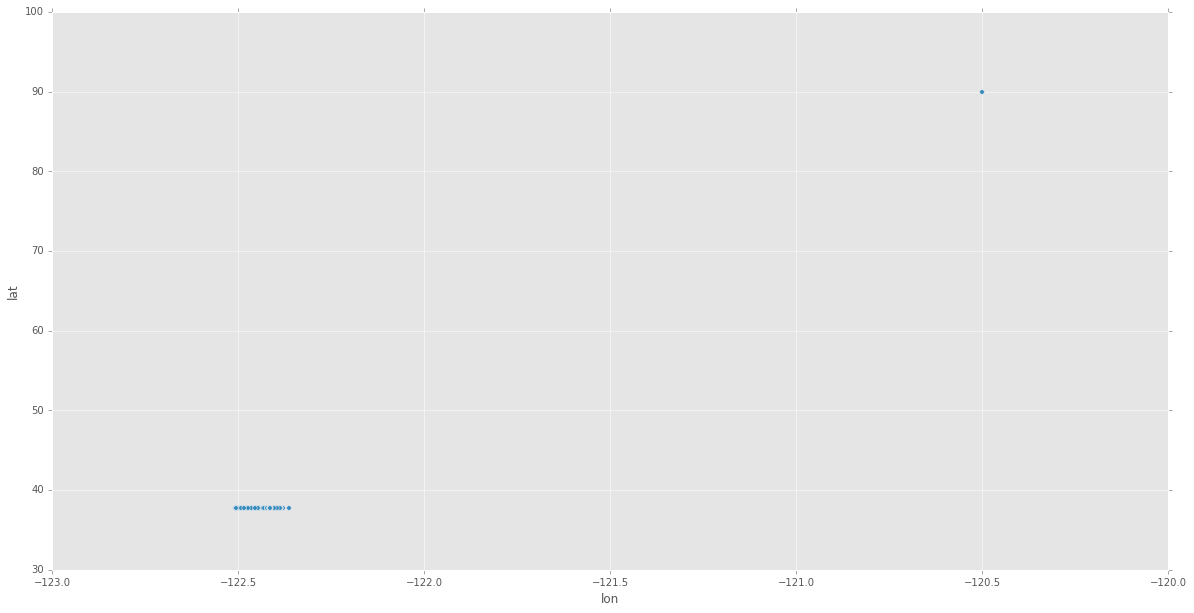

In [9]:
#I will now plot my coordinates to inspect the data visually
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot") #easy style importing

import matplotlib.pylab #For resizing figure
matplotlib.pylab.rcParams['figure.figsize'] = (20.0, 10.0) #Change figure size, laaarge

X = DataFrame(cc_df,columns = ['lon','lat'])
X.plot(kind='scatter', x='lon', y='lat')

As seen above we have a clear outsider that lies way outside SF, probably a typo. Hence we sort this datapoint out,

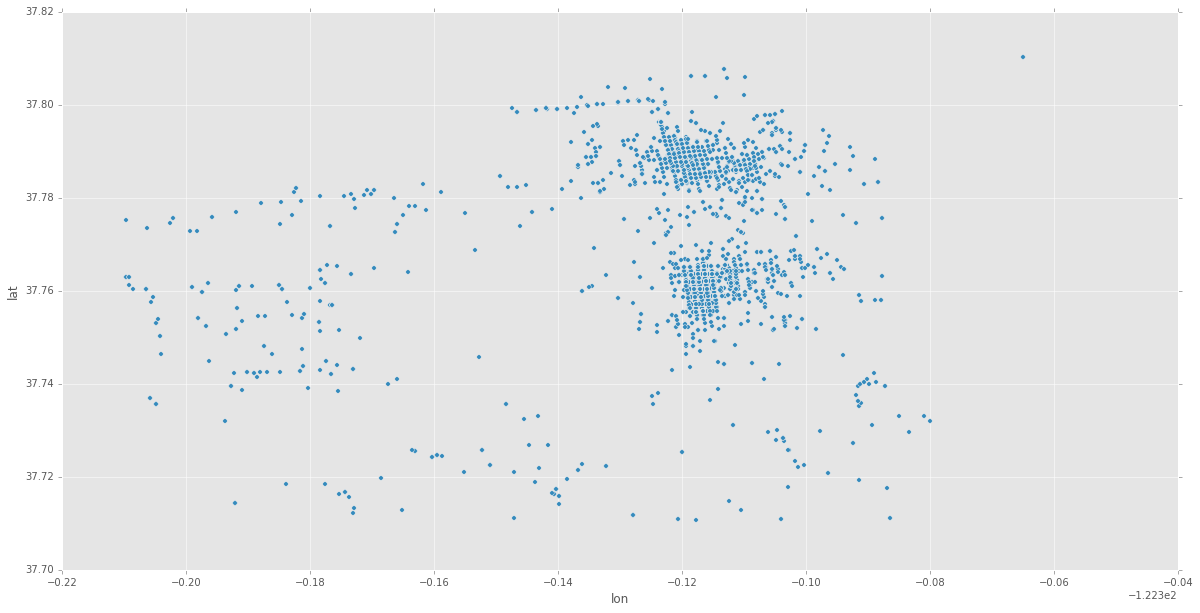

In [10]:
X = X[X['lon'] < -122]
X.plot(kind='scatter', x='lon', y='lat')

The points now all seem to be within SF borders

The 2 cluster centers are located at [[-122.4178032    37.78740516]
 [-122.41826714   37.7605898 ]] 


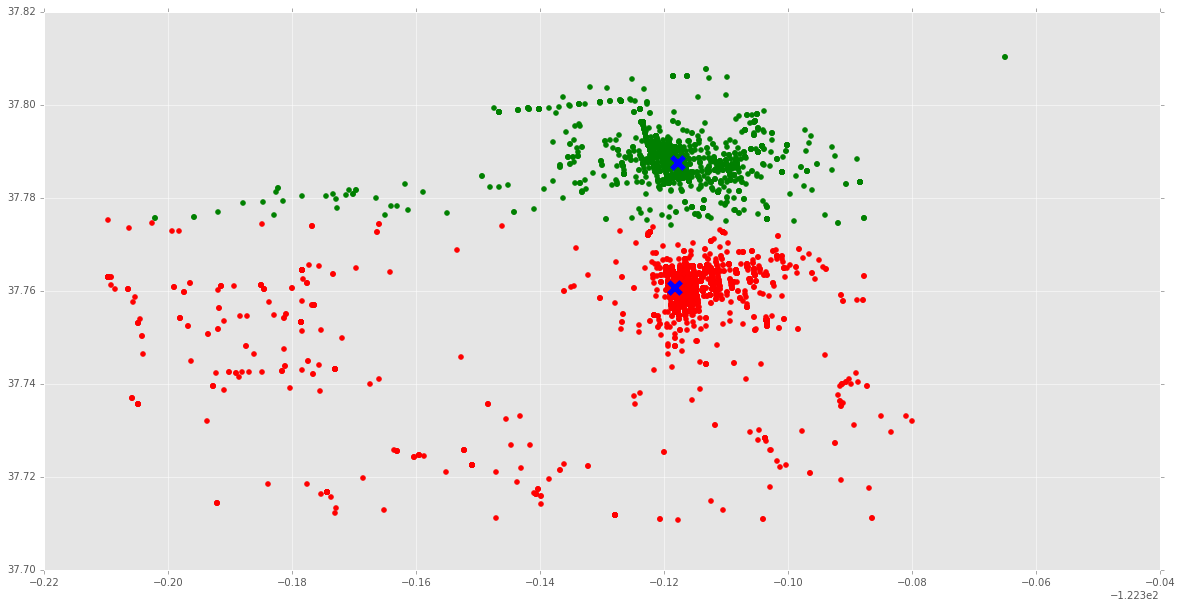

In [11]:
from sklearn.cluster import KMeans

#To work with out cluster we have to turn our panda dataframe into a numpy array,
np_X = np.array(X)

kmeans = KMeans(n_clusters=2)
kmeans.fit(np_X)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_

print "The %s cluster centers are located at %s " %(len(centroid),centroid)

colors = ["g.","r.","c."]

for i in range(len(np_X)):
   plt.plot(np_X[i][0],np_X[i][1],colors[labels[i]],markersize=10)

plt.scatter(centroid[:,0],centroid[:,1], marker = "x", s=150, linewidths = 5, zorder =10)

plt.show()

I will now look at the total squared error in relation to the number of clusters, to find the ideal knee bend,

In [12]:
from sklearn.cluster import KMeans

#To work with out cluster we have to turn our panda dataframe into a numpy array,
np_X = X

kmeans = KMeans(n_clusters=2)
kmeans.fit(np_X)

centroid = kmeans.cluster_centers_
classified_data = kmeans.labels_
labels = kmeans.labels_

print "The %s cluster centers are located at %s " %(len(centroid),centroid)

classified_data

#copy dataframe (may be memory intensive but just for illustration)
df_processed = X.copy()
df_processed['Cluster Class'] = pd.Series(classified_data, index=df_processed.index)

The 2 cluster centers are located at [[-122.41826714   37.7605898 ]
 [-122.4178032    37.78740516]] 


In [13]:
df_processed.head()

,lon,lat,Cluster Class
0,-122.427966,37.711823,0
1,-122.427966,37.711823,0
2,-122.427966,37.711823,0
3,-122.422063,37.789920,1
4,-122.422063,37.789920,1


array([[-122.42796629,   37.71182294,    0.        ],
       [-122.42796629,   37.71182294,    0.        ],
       [-122.42796629,   37.71182294,    0.        ],
       ..., 
       [-122.41607529,   37.78444966,    1.        ],
       [-122.41607529,   37.78444966,    1.        ],
       [-122.41607529,   37.78444966,    1.        ]])

In [16]:
centroid_df = DataFrame(centroid)

centroid_df.head()

,0,1
0,-122.418267,37.760590
1,-122.417803,37.787405


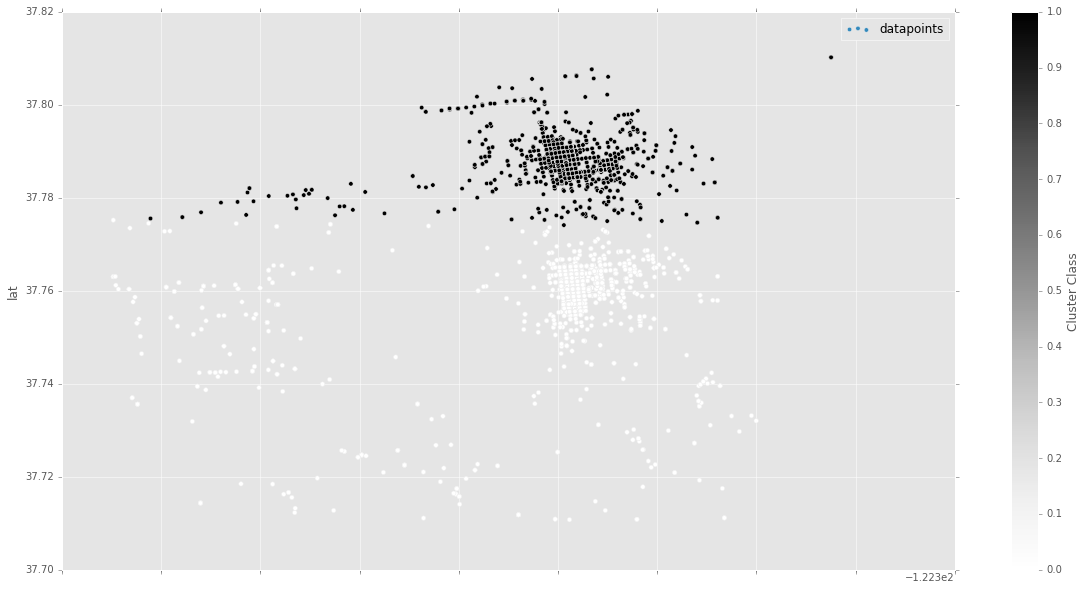

In [17]:
df_processed.plot(kind='scatter', x='lon', y='lat',
                  c = 'Cluster Class', label='datapoints');

In [18]:
"""
import numpy 
import pandas
from  matplotlib import pyplot
import seaborn
seaborn.set(style='ticks')

numpy.random.seed(0)
N = 37
_genders= ['Female', 'Male', 'Non-binary', 'No Response']
df = pandas.DataFrame({
    'Height (cm)': numpy.random.uniform(low=130, high=200, size=N),
    'Weight (kg)': numpy.random.uniform(low=30, high=100, size=N),
    'Gender': numpy.random.choice(_genders, size=N)
})

fg = seaborn.FacetGrid(data=df, hue='Gender', hue_order=_genders, aspect=1.61)
fg.map(pyplot.scatter, 'Weight (kg)', 'Height (cm)').add_legend()

########################################

import seaborn
seaborn.set(style='ticks')

fg = seaborn.FacetGrid(data=df_processed, hue='Cluster Class', hue_order=_classes, aspect=1.61)
fg.map(pyplot.scatter, 'Lat', 'Lon').add_legend()

"""

"\nimport numpy \nimport pandas\nfrom  matplotlib import pyplot\nimport seaborn\nseaborn.set(style='ticks')\n\nnumpy.random.seed(0)\nN = 37\n_genders= ['Female', 'Male', 'Non-binary', 'No Response']\ndf = pandas.DataFrame({\n    'Height (cm)': numpy.random.uniform(low=130, high=200, size=N),\n    'Weight (kg)': numpy.random.uniform(low=30, high=100, size=N),\n    'Gender': numpy.random.choice(_genders, size=N)\n})\n\nfg = seaborn.FacetGrid(data=df, hue='Gender', hue_order=_genders, aspect=1.61)\nfg.map(pyplot.scatter, 'Weight (kg)', 'Height (cm)').add_legend()\n\n########################################\n\nimport seaborn\nseaborn.set(style='ticks')\n\nfg = seaborn.FacetGrid(data=df_processed, hue='Cluster Class', hue_order=_classes, aspect=1.61)\nfg.map(pyplot.scatter, 'Lat', 'Lon').add_legend()\n\n"

In [19]:
from scipy.spatial import distance

def dist_euc(lon,lat,centroid):
    data_cord = [lon,lat]
    return distance.euclidean(data_cord,centroid)

df_processed['distance'] = df_processed.apply(lambda row: dist_euc(row['lon'], row['lat'],centroid[row['Cluster Class']]), axis=1)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [52]:
df_processed.head()

,lon,lat,Cluster Class,distance
0,-122.427966,37.711823,0,0.049722
1,-122.427966,37.711823,0,0.049722
2,-122.427966,37.711823,0,0.049722
3,-122.422063,37.789920,1,0.004947
4,-122.422063,37.789920,1,0.004947


In [21]:
ksum = []
def get_ksum(k):
    lonList = X['lon'].tolist()
    latList = X['lat'].tolist()
    
    for i in range(1,k):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        centroid = kmeans.cluster_centers_
        labels = kmeans.labels_
        
        tmp_sum = 0
        for index, row in enumerate(lonList):
            tmp_sum += dist_euc(lonList[index], latList[index], centroid[labels[index]])
        ksum.append(tmp_sum)
    
get_ksum(10)

print ksum

[231.8306421230425, 84.8721400620188, 65.80886850676222, 62.49634777264666, 57.26662356823066, 55.4103228143857, 53.546599004145904, 44.456528622067616, 42.13499311285233]


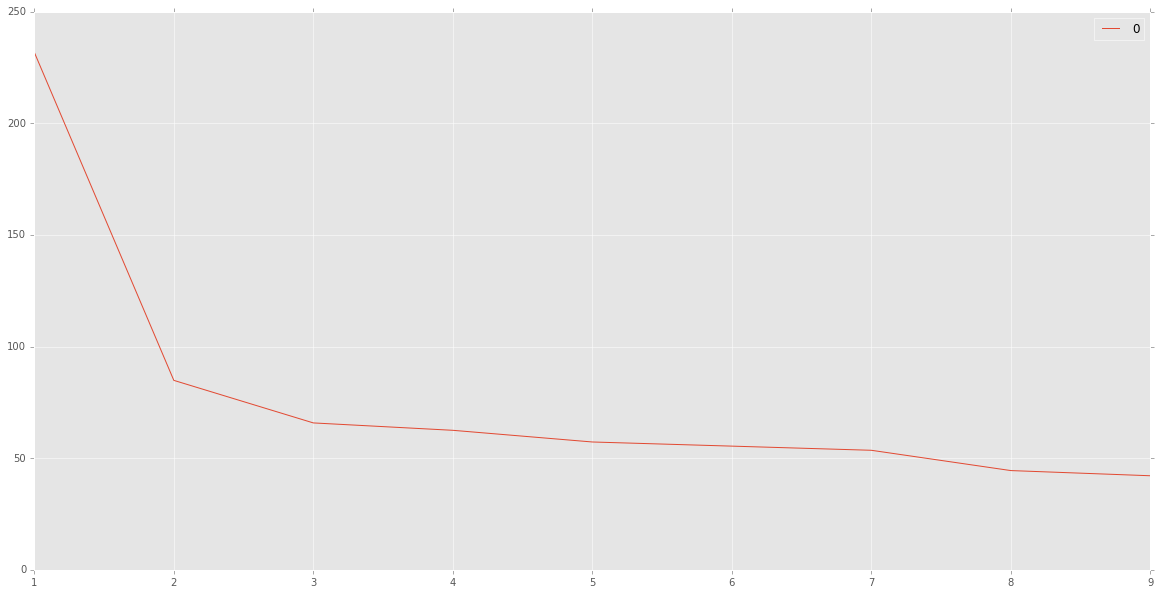

In [22]:
#I Transform my data into a Dataframe to do easy and pretty plotting :-) 
ksum_df = DataFrame(ksum, index = range(1,10))

ksum_df.plot()

As seen the error drops dramaticly as we move from 1 to 2 clusters. It also drops rather significantly from 2-3, though
not anything as much as the prior. The optimal solution would hence be either 2 or 3 clusters.

# CSV exporter for D3 data

In [ ]:
import csv
csv_file = df_processed[['lon','lat','Cluster Class']].values

csv_file

In [ ]:
with open('datapoints.csv','wb') as f:
    w = csv.writer(f)
    w.writerows(csv_file)

In [55]:

df_csv.head()

,lon,lat
0,-122.427966,37.711823
1,-122.427966,37.711823
2,-122.427966,37.711823
3,-122.422063,37.789920
4,-122.422063,37.789920


In [76]:
df_csv = X.copy(deep = True)
centroid_list = []
for i in range(1,7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    centroid = kmeans.cluster_centers_
    labels = kmeans.labels_
    column = "k%s" %i
    df_csv[column] = labels
    centroid_not_np = centroid.tolist()
    centroid_list.append(centroid_not_np)

In [83]:
df_csv.head()

,lon,lat,k1,k2,k3,k4,k5,k6
0,-122.427966,37.711823,0,1,2,3,4,4
1,-122.427966,37.711823,0,1,2,3,4,4
2,-122.427966,37.711823,0,1,2,3,4,4
3,-122.422063,37.789920,0,0,0,1,1,1
4,-122.422063,37.789920,0,0,0,1,1,1


In [85]:
centroid_list

[[[-122.41803041909377, 37.77427215999907]],
 [[-122.41780320059732, 37.78740515602903],
  [-122.4182671423892, 37.76058979633723]],
 [[-122.41779062564557, 37.78760431239461],
  [-122.47831657799604, 37.74518815117978],
  [-122.41564847455233, 37.76155620220855]],
 [[-122.41562007872984, 37.76167688325117],
  [-122.41778584583219, 37.78760571940798],
  [-122.48642314613244, 37.75842178851072],
  [-122.45747184755328, 37.71946982646254]],
 [[-122.41582749287205, 37.761464941182155],
  [-122.41874287370916, 37.78766041272921],
  [-122.48642314613244, 37.75842178851072],
  [-122.40558553542785, 37.78501910504481],
  [-122.45747184755328, 37.71946982646254]],
 [[-122.41597809642941, 37.7617317356573],
  [-122.41874287370916, 37.78766041272921],
  [-122.46212539586402, 37.720497775068125],
  [-122.48647474290841, 37.758516393336016],
  [-122.4040437900258, 37.72773672304826],
  [-122.40558553542785, 37.78501910504481]]]

In [78]:
df_csv.to_csv('csv_clusters.csv', index=False)

In [89]:
with open('centroids.csv','wb') as csvfile:
    w = csv.writer(csvfile,quoting=csv.QUOTE_MINIMAL)
    w.writerows(centroid_list)